# Importing Libs...

In [178]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
# import uuid
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer,Conv2D,Dense,MaxPooling2D,Input,Flatten

In [110]:
# Model(inputs=[inputimage,verification], outputs= [1,0])

In [111]:
# Input(shape=)

In [112]:
# class L1Dist(Layer)

### GPU

In [113]:
# ''' To limit GPU '''
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

# Folder Structures

In [114]:
# # Setting path
# POS_PATH = os. path.join('data', 'positive')
# NEG_PATH = os. path.join('data', 'negative')
# ANC_PATH = os. path.join('data', 'anchor')

In [115]:
# # making those folders
# os.makedirs(NEG_PATH)
# os.makedirs(POS_PATH)
# os.makedirs(ANC_PATH)

# Collecting Data

In [116]:
# !tar -xf lfw.tgz # Uncompressing tar GZ Lablled Facxes in Wild Dataset

# for i in os.listdir('lfw'):
#     for j in os.listdir(os.path.join('lfw', i)):
#         EX_PATH = os.path.join('lfw', i, j)
#         NEW_PATH = os.path.join(NEG_PATH, j)
#         os.replace(EX_PATH, NEW_PATH)

#### Collecting Positive Anchor Classes

In [117]:
# ANC_PATH

In [118]:
# # name = str(input("Enter Name :: "))
# name  = name.capitalize()
# # ANC_PATH = "Training/"+ name +"/anchor"
# ANC_PATH="application_data/input_data"
# POS_PATH = "Training/" + name + "/positive"
# name = name +'_'
# cap = cv2.VideoCapture(0)
# j = 0
# k = 0
# while cap.isOpened():
#     ret,fram = cap.read()
#     fram = fram[235:235+250,515:250+515]
#     cv2.imshow('Image Collection',fram)
#     if cv2.waitKey(1) & 0XFF == ord('a'):
#         # Create the unique file path
#         i = str(j)
#         # name_anc = name + i
#         name_anc = "input_image"
#         imgname = os.path.join (ANC_PATH, '{}.jpg'.format(name_anc))
#         j = j + 1
#         # Write out anchor image
#         cv2.imwrite(imgname, fram)
    
#     # elif cv2.waitKey(1) & 0XFF == ord('p'):
#     #     # Create the unique file path
#     #     # k = 0
#     #     p = str(k)
#     #     name_pos = name + p
#     #     imgname = os. path.join (POS_PATH, '{}.jpg'.format(name_pos))
#     #     k = k + 1
#     #     # Write out Positiv image
#     #     cv2.imwrite(imgname, fram)
            
#     elif cv2.waitKey(1) & 0XFF == ord('q'):
#         break
    
#     # else:
#     #     break
# cap.release()
# cv2.destroyAllWindows()

In [119]:
# fram

# Makernova task

In [120]:
# import numpy as np
# import cv2
# row = 8
# col = 8
# sq_s = 100
# img_width = col * sq_s
# img_height = row * sq_s
# chessboard_img = np.zeros((img_height, img_width, 3), dtype=np.uint8)
# for i in range(row):
#     for j in range(col):
#         x1, y1 = j * sq_s, i * sq_s
#         x2, y2 = (j + 1) * sq_s, (i + 1) * sq_s
#         if (i + j) % 2 == 0:
#             color = (255, 255, 255)
#         else:
#             color = (0, 0, 0)
#         cv2.rectangle(chessboard_img, (x1, y1), (x2, y2), color, -1)
# cv2.imshow("Chessboard", chessboard_img)
# cv2.waitKey(10000)
# cv2.destroyAllWindows()

# Load and Preprocessing Image

In [121]:
# anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(300)
# positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(300)
# negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(300)

In [179]:
def preprocess (file_path):
    byte_img= tf.io.read_file(file_path) # read
    img = tf.io.decode_jpeg(byte_img)   # Loading image
    img= tf.image.resize(img,(100,100))
    img = img/255 # scaling image (normalising)
    return img

## Creating Labelled Dataset

In [123]:
# Anchor, Positive => 1,1,1,1,1
# Anchor, Negative => 0,0,0,0,0

In [124]:
# file name change
# folder_path = "Training/Bhumi/positive"  # Relative path to the folder
# file_names = os.listdir(folder_path)
# for file_name in file_names:
#     old_path = os.path.join(folder_path, file_name)
#     file_name_without_extension, file_extension = os.path.splitext(file_name)
#     new_file_name = file_name_without_extension + "_p" + file_extension
#     new_path = os.path.join(folder_path, new_file_name)
#     os.rename(old_path, new_path)
#     print(f"Renamed: {file_name} -> {new_file_name}")

# print("All files renamed.")


In [125]:
# name  = 'Dev'
# "Training/"+ name +"/anchor"

In [180]:
# name = str(input("Enter Name :: ")+'_')
# name  = capitalize(name)
# # ANC_PATH = "/Users/DEVDESAI1/Desktop/Projects/Face_Recognision/Training/" + name + "/anchor"
# # POS_PATH = "/Users/DEVDESAI1/Desktop/Projects/Face_Recognision/Training/" + name + "/positive"
count = 0
names=['Chirag','Dev','Bhumi']
for name in names:
    ANC_PATH = "Training/"+ name +"/anchor"
    POS_PATH = "Training/" + name + "/positive"
    NEG_PATH = "Training/" + name + "/negative"
    anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(300)
    positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(300)
    negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(300)
    positives = tf.data.Dataset.zip((anchor,positive,tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
    negatives = tf.data.Dataset.zip((anchor,negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
    if count == 1:
        data = data.concatenate(negatives)
        data = data.concatenate(positives)
    elif count == 0:
        data = positives.concatenate(negatives)
        count = 1

In [127]:
# samples = data.as_numpy_iterator()

In [128]:
# for i in range(1000):
#     print(samples.next())

In [129]:
def preprocess_twin(input_img,validation_img,label):
    return(preprocess(input_img),preprocess(validation_img),label)

In [130]:
# 0->anchor, 1->+ve or -ve, 2->lable
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [131]:
# len(data)*.7
# (1260)/(420/16)

In [132]:
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [133]:
test_data = data.skip(round(len(data)*0.7))
test_data = test_data.take(round(len(data)*0.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# Model

### Embedding layer

In [134]:
def make_embedding():
    inp = Input(shape=(100,100,3),name = 'input_image')
    c1 = Conv2D(64,(10,10),activation='relu')(inp) # 64 filters of 10x10 size and stride  = 1
    m1 = MaxPooling2D(64,(2,2),padding='same')(c1)
    c2 = Conv2D(128,(7,7),activation='relu')(m1) 
    m2 = MaxPooling2D(64,(2,2),padding='same')(c2)
    c3 = Conv2D(128,(4,4),activation='relu')(m2) 
    m3 = MaxPooling2D(64,(2,2),padding='same')(c3)
    c4 = Conv2D(256,(4,4),activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096,activation='sigmoid')(f1)
    return Model(inputs=[inp],outputs=[d1],name='embedding')

In [135]:
embedding = make_embedding()
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 17, 17, 128)       26

In [136]:
# inp = Input(shape=(100,100,3),name = 'input_image')
# c1 = Conv2D(64,(10,10),activation='relu')(inp) # 64 filters of 10x10 size and stride  = 1
# m1 = MaxPooling2D(64,(2,2),padding='same')(c1)
    
# c2 = Conv2D(128,(7,7),activation='relu')(m1) 
# m2 = MaxPooling2D(64,(2,2),padding='same')(c2)
    
# c3 = Conv2D(128,(4,4),activation='relu')(m2) 
# m3 = MaxPooling2D(64,(2,2),padding='same')(c3)
    
# c4 = Conv2D(256,(4,4),activation='relu')(m3)
# f1 = Flatten()(c4)
# d1 = Dense(4096,activation='sigmoid')(f1)
# mod = Model(inputs=[inp],outputs=[d1],name='embedding')
# mod.summary()

### Built Siamese Neural Network L1 Distance

In [137]:
class L1Dist(Layer):
    def __init__(self,**kwargs): # makes exporting and importing of this specific part easily
        super().__init__()
    def call(self,input_embedding,validation_embedding): # loss function types
        return tf.math.abs((input_embedding)-(validation_embedding))

In [138]:
# l1 = L1Dist()
# l1(anchor_embedding,validation_embedding)

### All together

In [139]:
# input_image = Input(name='input_img', shape=(100,100,3))
# validation_image = Input(name='validation_img', shape=(100,100,3))
# inp_embedding = embedding(input_image)
# val_embedding = embedding(validation_image)
# siamese_layer = L1Dist()
# distances = siamese_layer(inp_embedding, val_embedding)
# classifier = Dense(1, activation='sigmoid')(distances)
# # classifier
# siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')
# siamese_network.summary()

In [140]:
def make_siamese_model():
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [141]:
siamese_model = make_siamese_model()
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

# Training

In [142]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [143]:
opt = tf.keras.optimizers.Adam(1e-4)

In [144]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [145]:
# make prediction
# calculate losses
# derive gradient
# claculate new weighta and apply

In [146]:
@tf.function
def train_step(batch):
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

In [147]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 5 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [148]:
EPOCHS = 50
# train(train_data, EPOCHS)

# Evaluate Model

In [149]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [150]:
y_hat = siamese_model.predict([test_input, test_val])

1/1 [==============================] - 2s 2s/step


In [151]:
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]

In [152]:
y_true

array([1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0.],
      dtype=float32)

In [153]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [154]:
# Creating a metric object
m = Precision()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

0.71428573

In [155]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1/1 [==============================] - 1s 1s/step
0.852349 0.5313808


In [156]:
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]

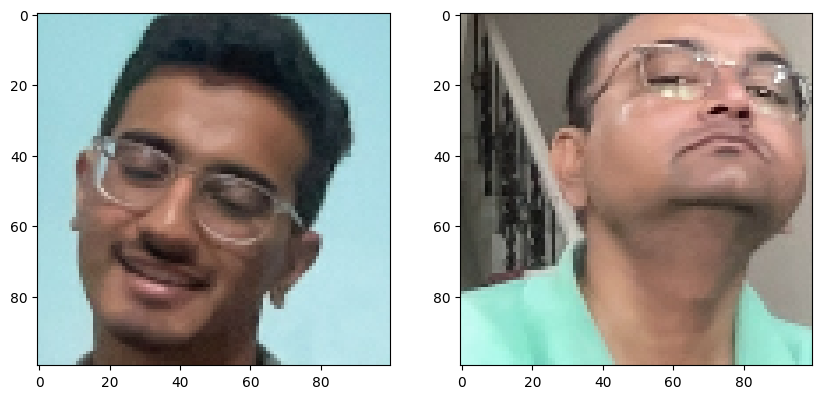

In [176]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
a = 0
plt.subplot(1,2,1)
plt.imshow(test_input[a])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[a])

# Renders cleanly
plt.show()

In [158]:
# siamese_model.save('Siamese_model_DBC.h5')

In [177]:
L1Dist

__main__.L1Dist

In [160]:
siamese_model = tf.keras.models.load_model('Siamese_model_DBC.h5',custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [161]:
siamese_model.predict([test_input,test_val])
siamese_model.summary()

1/1 [==============================] - 1s 1s/step
Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                   

In [162]:
# os.listdir(os.path.join('application_data', 'verification_images'))

In [163]:
# os.path.join('application_data', 'input_image', 'input_image.jpg')

In [164]:
# for image in os.listdir(os.path.join('application_data', 'verification_images')):
#     validation_img = os.path.join('application_data', 'verification_images', image)
#     print(validation_img)

In [165]:
# for count in range(186):
#     print(count)

In [166]:
# for image in os.listdir(os.path.join('application_data','verification_images')):
#     print(image)


In [167]:
def verify(model, detection_threshold, verification_threshold):
    #d = {'amisha': 0, 'atish': 0, 'ayush': 0, 'balaji': 0, 'manish': 0, 'misbah': 0, 'raja': 0, 'vatsal': 0}
    d_name = {'Dev':[], 'Bhumi': [], 'Chirag': []}
    d_verify = {'Dev': False, 'Bhumi': False, 'Chirag': False}
    for image in os.listdir(os.path.join('application_data','verification')):
        #input_image.jpg naam hai file ka that is captuerd from the webcam it could be changed
        input_img = preprocess(os.path.join('application_data', 'input_data', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data','verification', image))
        # Make Predictions
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        # result = model.predict([input_img, validation_img])
        #extracting name of verification images
        
        L = image.split("_")
        #results.append(result)
        d_name[L[0]].append(result)
# need to run a loop for all people jinka data hai for the below operations


    for i in d_name:
        length = 0
        detection = np.sum(np.array(d_name[i]) > detection_threshold)
        # verification = detection / len(os.listdir(os.path.join('classify', 'verification')))
        for photo in os.listdir(os.path.join('application_data', 'verification')):
            L = photo.split("_")
            if (L[0]==i):
                length+=1
        verification = detection / length
        #the length above check karne ka loop hai because multiple people ki images hai
        d_verify[i] = verification < verification_threshold

    #return results, verified
    return d_name, d_verify


In [168]:
def classify(model, detection_threshold, verification_threshold):
    #d = {'amisha': 0, 'atish': 0, 'ayush': 0, 'balaji': 0, 'manish': 0, 'misbah': 0, 'raja': 0, 'vatsal': 0}
    d_name = {'Dev':[], 'Bhumi': [], 'Chirag': []}
    d_verify = {'Dev': False, 'Bhumi': False, 'Chirag': False}
    for image in os.listdir(os.path.join('application_data','verification')):
        #input_image.jpg naam hai file ka that is captuerd from the webcam it could be changed
        input_img = preprocess(os.path.join('application_data', 'input', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data','verification', image))
        # Make Predictions
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        # result = model.predict([input_img, validation_img])
        #extracting name of verification images
        
        L = image.split("_")
        #results.append(result)
        d_name[L[0]].append(result)
# need to run a loop for all people jinka data hai for the below operations


    for i in d_name:
        length = 0
        detection = np.sum(np.array(d_name[i]) > detection_threshold)
        # verification = detection / len(os.listdir(os.path.join('application_data', 'verification')))
        for photo in os.listdir(os.path.join('application_data', 'verification')):
            L = photo.split("_")
            if (L[0]==i):
                length+=1
        verification = detection / length
        #the length above check karne ka loop hai because multiple people ki images hai
        d_verify[i] = verification < verification_threshold

    #return results, verified
    return d_name, d_verify


In [169]:
d_result, d_verify = classify(siamese_model,0.5,0.999999)
d_verify

2023-08-27 15:11:58.021499: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: application_data/input/input_image.jpg; No such file or directory


NotFoundError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} application_data/input/input_image.jpg; No such file or directory [Op:ReadFile]

In [ ]:
# def verify(model, detection_threshold, verification_threshold):
#     # Build results array
#     count = 0
#     results = []
#     i=0
#     for image in os.listdir(os.path.join('application_data','verification_images')):
#         if (count<=62 and count>=0):
#             input_img = preprocess(os.path.join('application_data','input_image','input_image.jpg'))
#             validation_img = preprocess(os.path.join('application_data','verification_images',image))
#             result = model.predict(list(np.expand_dims([input_img,validation_img], axis=1)))
#             if(result < detection_threshold):
#                 results[0]+=1
#             count+=1
#         elif (count<=124 and count>=63):
#             input_img = preprocess(os.path.join('application_data','input_image','input_image.jpg'))
#             validation_img = preprocess(os.path.join('application_data','verification_images',image))
#             result = model.predict(list(np.expand_dims([input_img,validation_img], axis=1)))
#             if(result < detection_threshold):
#                 results[1]+=1
#             count+=1
#         elif (count<=186 and count>=125):
#             input_img = preprocess(os.path.join('application_data','input_image','input_image.jpg'))
#             validation_img = preprocess(os.path.join('application_data','verification_images',image))
#             result = model.predict(list(np.expand_dims([input_img,validation_img], axis=1)))
#             if(result < detection_threshold):
#                 results[2]+=1
#             count+=1
    
#     # Detection Threshold: Metric above which a prediciton is considered positive 
#     # detection = np.sum(np.array(results) > detection_threshold)
    
#     # Verification Threshold: Proportion of positive predictions / total positive samples 
#     # verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
#     # verified = verification > verification_threshold
#     max = 0
#     for i in len(results):
#         if max < results[i]:
#             n = i
#         else:
#             continue
#     return results , n

In [ ]:
# d_result, d_verify = verify(siamese_model,0.5,0.999999999)
# d_verify

In [ ]:
# d_verify

In [ ]:
# cap = cv2.VideoCapture(0)
# while cap.isOpened():
#     ret, frame = cap.read()
#     frame = frame[235:235+250,515:250+515]
    
#     cv2.imshow('Verification', frame)
    
#     # Verification trigger
#     if cv2.waitKey(10) & 0xFF == ord('v'):
#         # Save input image to application_data/input_image folder 
# #         hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# #         h, s, v = cv2.split(hsv)

# #         lim = 255 - 10
# #         v[v > lim] = 255
# #         v[v <= lim] -= 10
        
# #         final_hsv = cv2.merge((h, s, v))
# #         img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

#         cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
#         # Run verification
#         results, verified = verify(siamese_model, 0.5, 0.5)
#         print(verified)
    
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
# np.sum(np.squeeze(results) > 0.9)